<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/Xalqlar_dostlu%C4%9Fu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Radiozavod" supermarketidagi savdo holati


In [1]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Xalqlar%20dostlu%C4%9Fu.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,LIPTON 0.5LT ICE TEA YASIL CAY PL/Q,Yaxna choylar,0.99,2019-10-12,True
1,KONFET KONTI SOUFFLE DESSERT KG,Shirinliklar,8.20,2019-10-12,True
2,MVT.3KG ALCA TURSUSU,Tuzlamalar,5.90,2019-10-12,True
3,HAMAM DESMALI USAQ UCUN,To'qimachilik,8.10,2019-10-12,True
4,PRESIDENT 150GR PENDIR MAAZDAM 8LI,Pishloqlar,2.50,2019-10-12,True
5,OLITALIA 1LT ZEYTUN YAGI EXTRAVIRGIN,Yog'lar,21.95,2019-10-12,True
6,OZ DAD 450GR KURU BADIMCAN KOZ,Konservalangan sabzavotlar,4.95,2019-10-12,True
7,PROSTOKVASINO 130GR KESMIK 0%,Tvorog,1.40,2019-10-12,True
8,FIRIN.COREK COVDARLI 250GR BATON EDED,Non,0.50,2019-10-12,True
9,ORION 42GR CHOCO BOY PECENYE+SOKOLAD QUTU,Shirinliklar,1.00,2019-07-09,True


In [3]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20797 entries, 0 to 20796
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20797 non-null  object 
 1   mahsulot_turi   20797 non-null  object 
 2   mahsulot_narhi  20797 non-null  float64
 3   sotilgan_vaqti  20797 non-null  object 
 4   bonus_karta     20797 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 670.3+ KB


In [4]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [5]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20797 entries, 0 to 20796
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20797 non-null  object        
 1   mahsulot_turi   20797 non-null  object        
 2   mahsulot_narhi  20797 non-null  float64       
 3   sotilgan_vaqti  20797 non-null  datetime64[ns]
 4   bonus_karta     20797 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 670.3+ KB


In [6]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2052
1745
2124
2104
2163
2026
2045
2141
2302
2076
19
0


In [7]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2052
1745
2124
2104
2163
2026
2045
2141
2302
2076
0
0


In [8]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,LIPTON 0.5LT ICE TEA YASIL CAY PL/Q,Yaxna choylar,0.99,2019-10-12,True
1,KONFET KONTI SOUFFLE DESSERT KG,Shirinliklar,8.20,2019-10-12,True
2,MVT.3KG ALCA TURSUSU,Tuzlamalar,5.90,2019-10-12,True
3,HAMAM DESMALI USAQ UCUN,To'qimachilik,8.10,2019-10-12,True
4,PRESIDENT 150GR PENDIR MAAZDAM 8LI,Pishloqlar,2.50,2019-10-12,True
...,...,...,...,...,...
20792,YASRIB 500GR CAY EARL GREY,Choy,14.65,2019-07-15,False
20793,SIGARET SOBRANIE KS SLIMS BLACKS,Tamaki mahsulotlari,3.60,2019-03-01,False
20794,TACH BULASIK SUNGERI 10-LU,"Yuvish vositalari, tozalagichlar",1.90,2019-03-01,False
20795,KONFET SUVOROV PLOMBIRINI KG,Shirinliklar,8.50,2019-03-01,False


In [9]:
#9 2019-yilda "Xalqlar dostluğu" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4724
Maishiy buyumlar,1153
"Yuvish vositalari, tozalagichlar",1027
Mevali sharbatlar,929
Idish-tovoq,823
...,...
Kefir,21
Suzma,16
Tayyor ovqatlar,15
Shampan,12


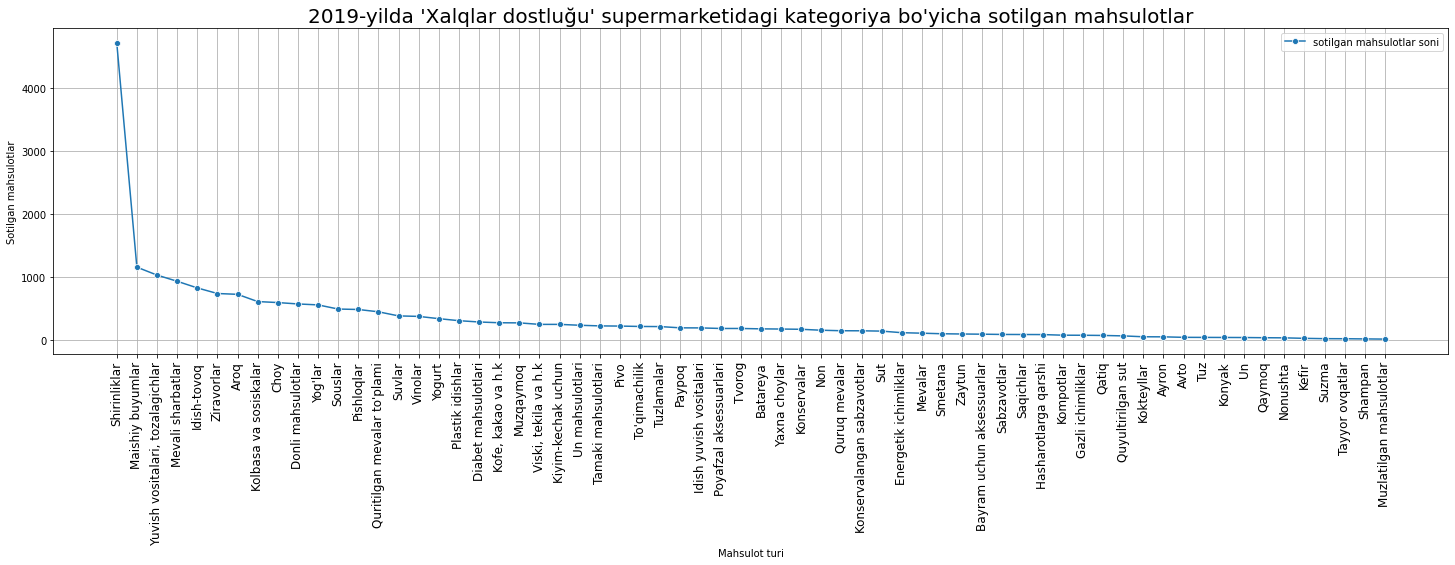

In [10]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Xalqlar dostluğu' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [12]:
#10 2019-yilda "Xalqlar dostluğu" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10677.24
Avto,202.71
Ayron,32.86
Batareya,670.49
Bayram uchun aksessuarlar,259.76
...,...
Yog'lar,5111.85
Yogurt,445.66


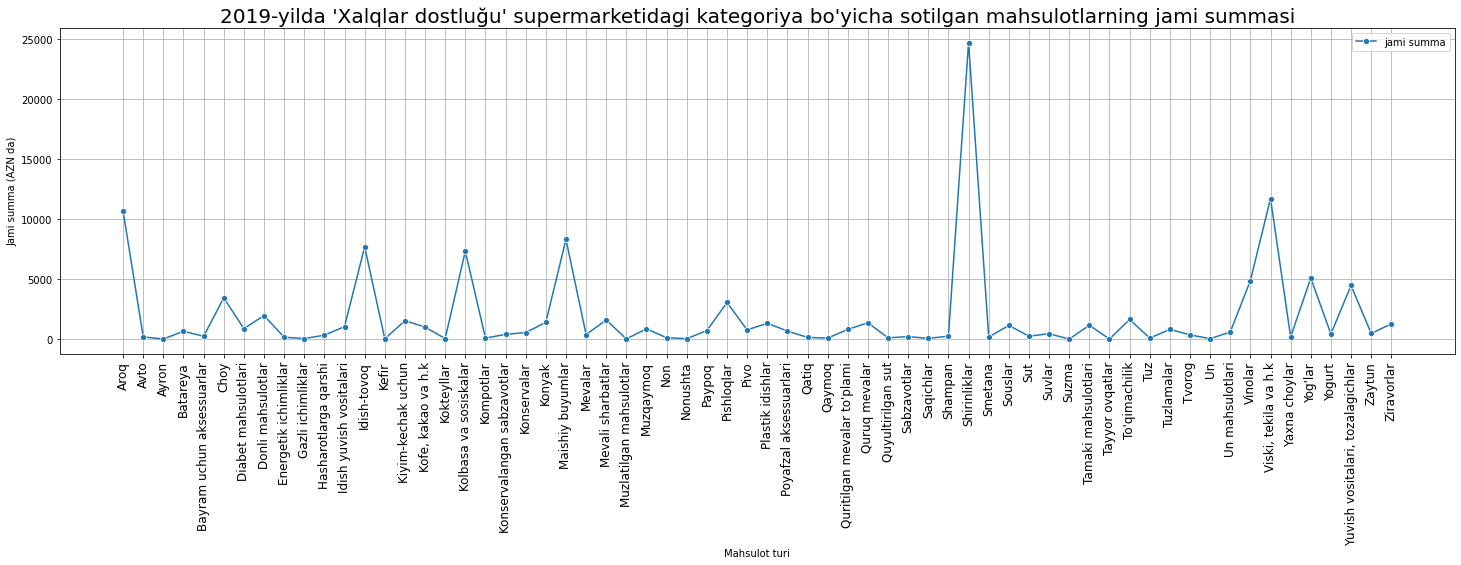

In [13]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Xalqlar dostluğu' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [14]:
#11 2019-yilda "Xalqlar dostluğu" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10527,10251


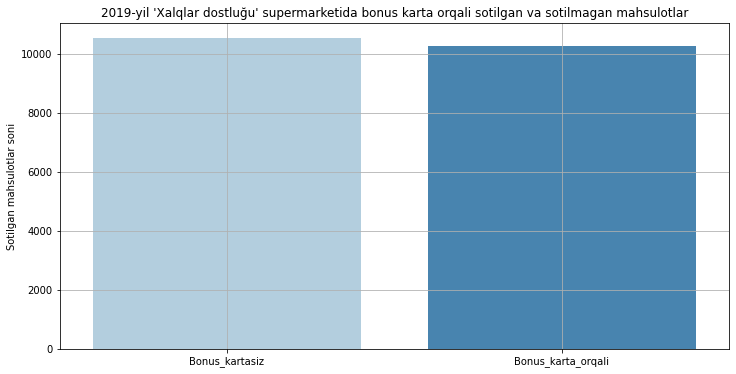

In [15]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Xalqlar dostluğu' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [16]:
#12 2019-yilda "Xalqlar dostluğu" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2052
Fevral,1745
Mart,2124
Aprel,2104
May,2163
Iyun,2026
Iyul,2045
Avgust,2141
Sentabr,2302
Oktabr,2076


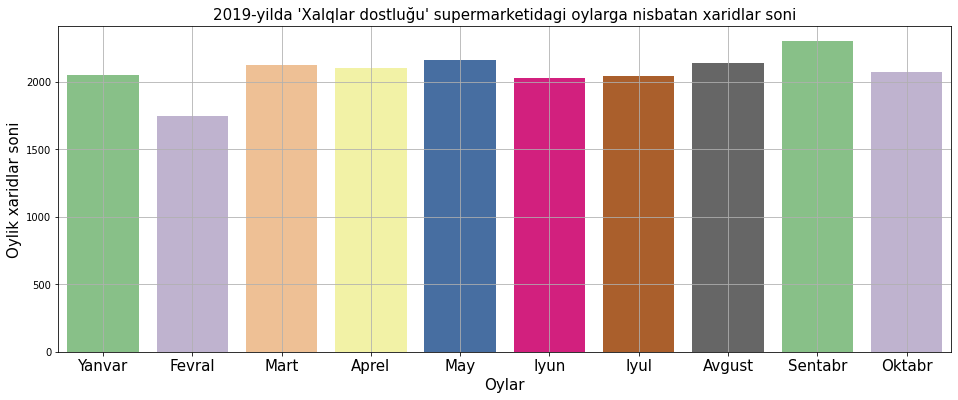

In [17]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Xalqlar dostluğu' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [18]:
#13 2019-yilda "Xalqlar dostluğu" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3046
Seshanba,2985
Chorshanba,3061
Payshanba,3090
Juma,3105
Shanba,2983
Yakshanba,2508


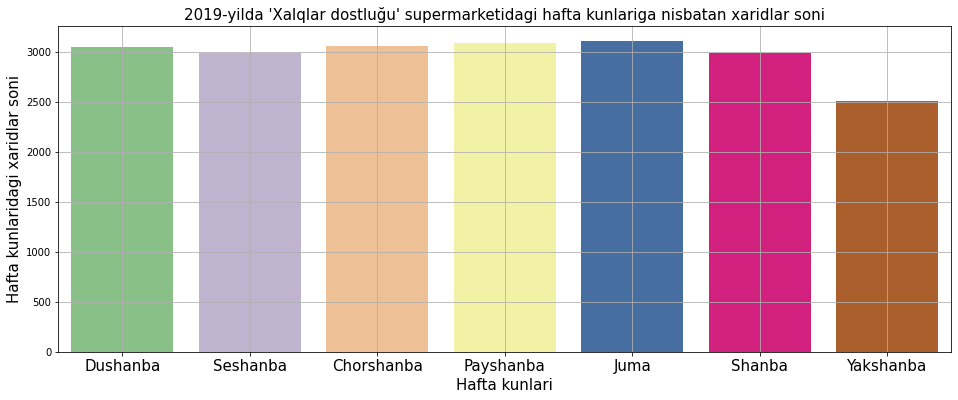

In [19]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Xalqlar dostluğu' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [20]:
#14 2019-yilda "Xalqlar dostluğu" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,672
2,674
3,590
4,756
5,553
6,672
7,891
8,657
9,628
10,671


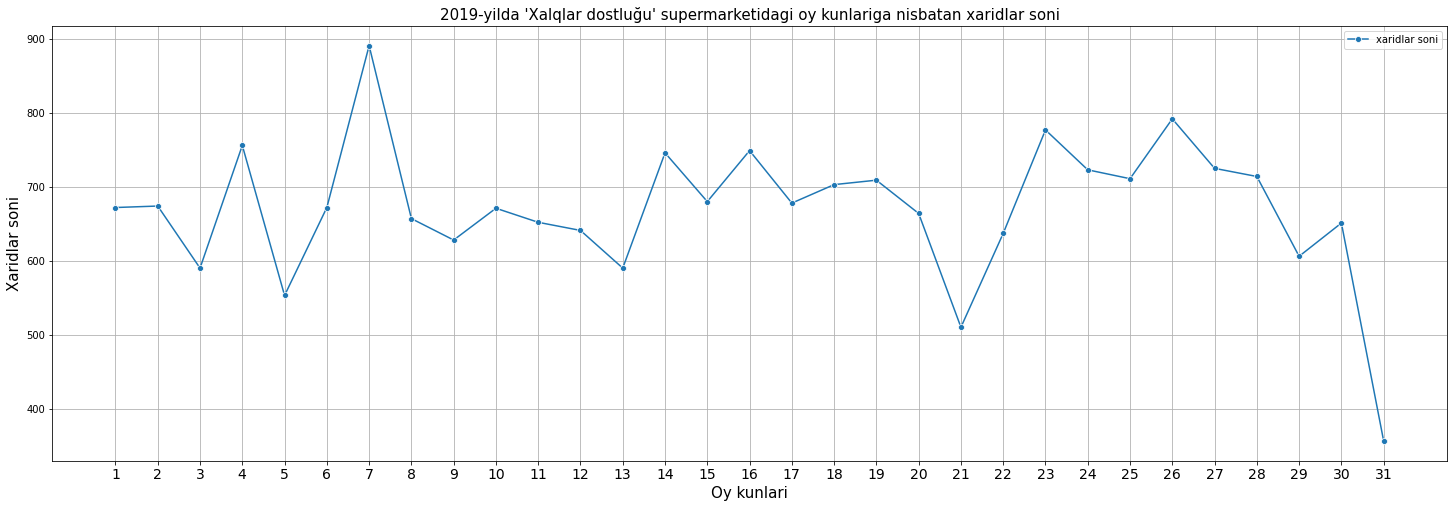

In [21]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Xalqlar dostluğu' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [22]:
#15 2019-yil 'Xalqlar dostluğu' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [23]:
len(oy_sanalari)

310

In [24]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [25]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [26]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,45,66,60,94,57,67,98,77,67,57,100,52,55,47,71,86,73,55,100,41,27,63,97,33,62,66,65,94,83,55,39
Fevral,69,40,41,58,86,50,93,53,71,36,63,55,40,75,31,79,45,68,38,67,70,88,81,67,53,82,79,67,0,0,0
Mart,64,66,69,66,19,98,88,67,96,53,64,53,47,57,66,88,62,91,79,67,62,63,90,69,62,96,65,71,72,45,69
Aprel,79,79,63,42,53,49,60,99,34,107,63,63,62,78,77,81,69,76,56,56,61,84,93,82,116,78,39,45,80,80,0
May,70,60,82,94,82,105,102,67,86,82,74,37,72,53,80,62,41,68,62,66,39,42,64,84,64,64,74,54,77,81,75
Iyun,127,60,56,94,32,94,107,75,40,89,49,56,48,113,68,49,78,82,55,45,55,50,72,40,69,80,75,55,73,40,0
Iyul,51,90,41,54,43,48,98,50,65,76,64,109,81,67,75,101,45,64,75,43,27,68,63,69,87,71,85,66,40,73,56
Avgust,80,67,23,65,73,61,65,60,49,50,37,73,47,91,75,50,104,59,73,54,67,77,71,83,84,101,90,92,56,108,56
Sentabr,33,69,64,84,63,64,100,58,58,57,105,69,83,104,74,77,73,82,103,145,57,60,76,109,54,90,86,68,53,84,0
Oktabr,54,77,91,105,45,36,80,51,62,64,33,74,55,61,63,76,88,58,68,80,45,42,70,87,60,64,67,102,72,85,61


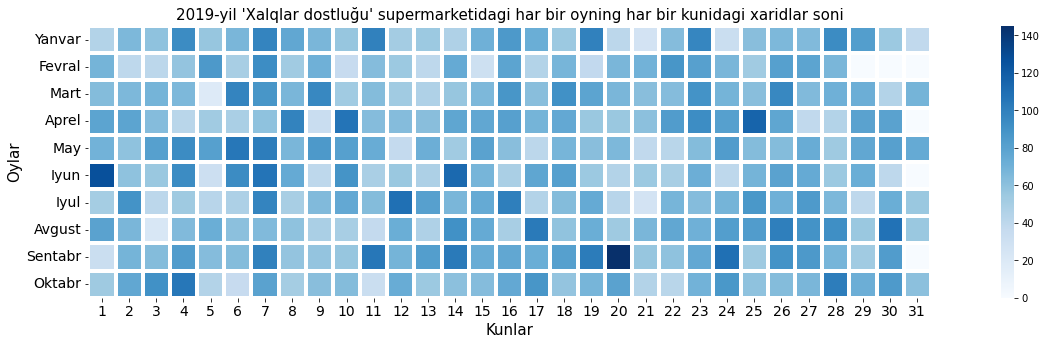

In [27]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Xalqlar dostluğu' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

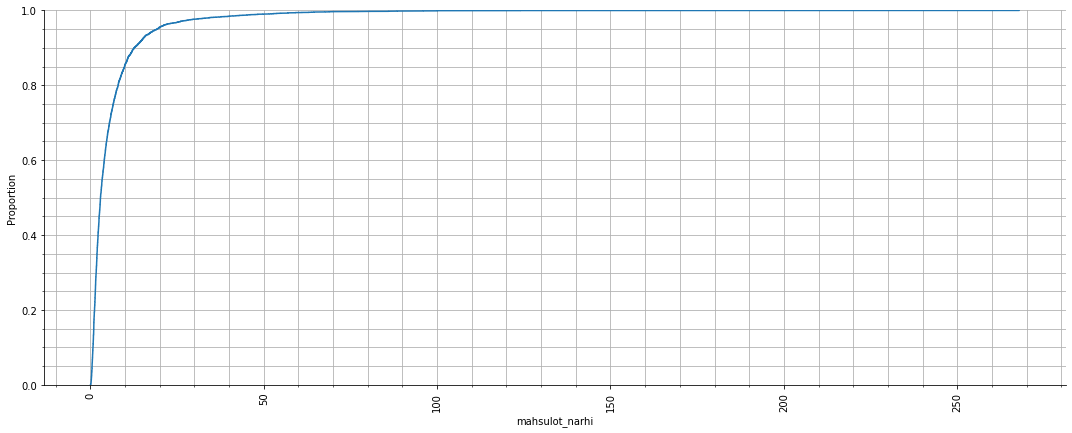

In [28]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()